In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import os
from pathlib import Path

/tmp/ipykernel_7119/767163670.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Coleta da taxa de retorno risk free

def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1/periods) - 1

annualized = yf.download("^IRX", start="1995-01-01", end="2023-12-31")["Adj Close"]
daily = annualized.apply(deannualize)

# create dataframe
risk_free_rates = pd.DataFrame({"annualized": annualized, "daily": daily})
risk_free_rates['daily'] = risk_free_rates['daily'] / 100
print(np.shape(risk_free_rates))
risk_free_rates.head()

/home/marcelo/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

(7282, 2)


,annualized,daily
Date,,
1995-01-03,5.52,0.000051
1995-01-04,5.69,0.000052
1995-01-05,5.71,0.000052
1995-01-06,5.74,0.000052
1995-01-09,5.75,0.000052


In [3]:
# Usando Google Colab:
'''
from google.colab import drive

drive.mount('/content/drive')
pasta = str("/content/drive/MyDrive/Python/TCC-Cloud/Clustering/result_clustering/")
pasta
'''

'\nfrom google.colab import drive\n\ndrive.mount(\'/content/drive\')\npasta = str("/content/drive/MyDrive/Python/TCC-Cloud/Clustering/result_clustering/")\npasta\n'

In [4]:
# Especificando o caminho padrão do projeto:
pasta = str(Path.cwd().parents[0]) + ("/Clustering/result_clustering/")
pasta

'/mnt/c/Users/MarceloPolecram/Python/MEU_TCC/Clustering/result_clustering/'

In [5]:
'''
operations = pd.read_csv(pasta + "operations_No_Clusters_C.csv")
operations['Pair'] = operations['Ticker 1'] + "-" + operations['Ticker 2']
print(operations.tail())
'''

print('\nPares por Distância:')

operations = pd.read_csv(pasta + "operations_No_Clusters_D.csv")
operations['Pair'] = operations['Ticker 1'] + "-" + operations['Ticker 2']
print(operations.tail())



Pares por Distância:
      Operação  Semestre  Abertura  Fechamento  Dias  Retorno total Ticker 1  \
1135         2        54        52         102    50      -0.172355    ELET6   
1136         3        54       103         127    24       0.085574    ELET6   
1137         1        54         1          51    50      -0.141726    AMER3   
1138         2        54        52         102    50       0.079439    AMER3   
1139         3        54       103         127    24      -0.223986    AMER3   

     Ticker 2  Converged          Index  Retorno total - exp         Pair  
1135    SYNE3       True  ELET6-SYNE3-2             0.841680  ELET6-SYNE3  
1136    SYNE3      False  ELET6-SYNE3-3             1.089342  ELET6-SYNE3  
1137    GEPA4       True  AMER3-GEPA4-1             0.867859  AMER3-GEPA4  
1138    GEPA4       True  AMER3-GEPA4-2             1.082680  AMER3-GEPA4  
1139    GEPA4      False  AMER3-GEPA4-3             0.799326  AMER3-GEPA4  


In [11]:
operations_by_pair = operations.groupby("Pair").sum("Retorno total")

#print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
print(f"Número de operações: {np.shape(operations)[0]}")
print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
print(f"Positive Returns: {sum(operations['Retorno total'] > 0)}\nNegative: {sum(operations['Retorno total'] < 0)}")
print(f"Average trade lenght: {operations['Dias'].mean()}")
print(f"Convergência: {(operations['Converged'].sum()/np.shape(operations)[0])*100} %")
print(f"Highest Return: {round(100*operations['Retorno total'].max(),4)} %")
print(f"Lowest Return: {round(100*operations['Retorno total'].min(),4)} %")
print(f"Average Return: {round(100*operations['Retorno total'].mean(),4)} %")   
print(f"Retorno médio por par: {round(100*operations_by_pair['Retorno total'].mean(),4)} %")
print(f"Retorno médio por par por semestre: {round(np.divide(100*operations_by_pair['Retorno total'].mean(),max(operations['Semestre'])+1),4)} %")

Número de operações: 1140
Número de pares: 408
Positive Returns: 628
Negative: 509
Average trade lenght: 41.271929824561404
Convergência: 67.54385964912281 %
Highest Return: 227.4985 %
Lowest Return: -127.4428 %
Average Return: 4.1387 %
Retorno médio por par: 11.5639 %
Retorno médio por par por semestre: 0.2103 %


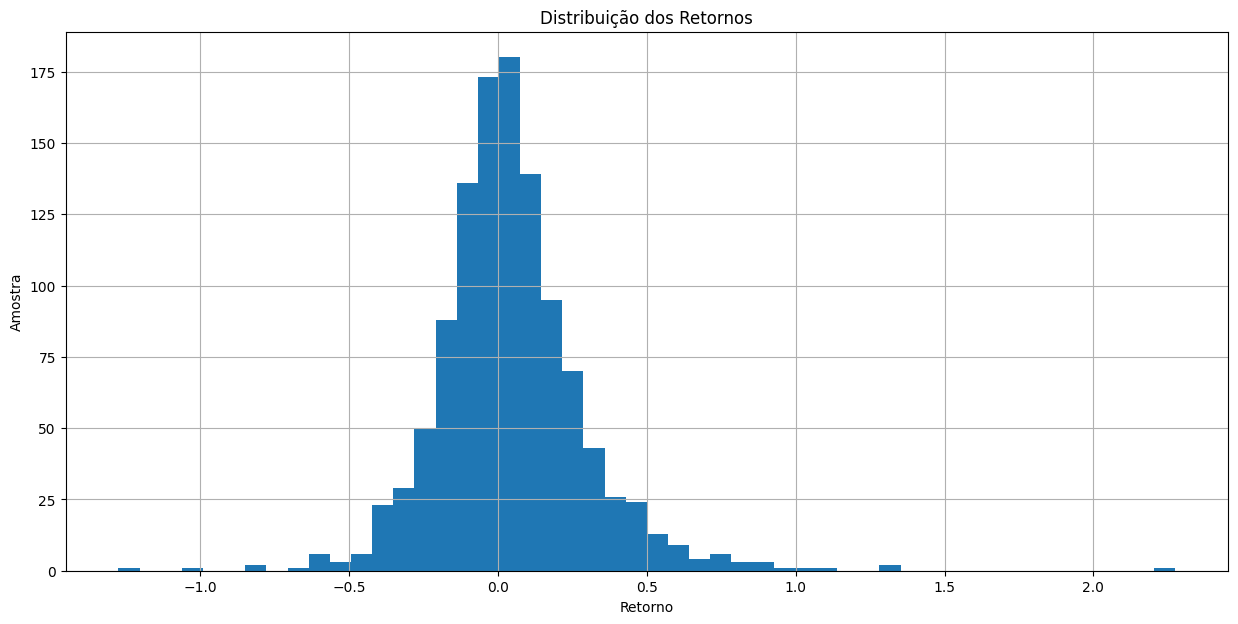

In [7]:
# Return Distribution
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
operations['Retorno total'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Retorno')
ax1.set_ylabel('Amostra')
ax1.set_title('Distribuição dos Retornos')
plt.show()

In [9]:
# Ações com maior participação
stock_count = {}

for pair in operations_by_pair.index:
    stocks = pair.split("-")
    for stock in stocks:
        if stock in stock_count:
            stock_count[stock] += 1
        else:
            stock_count[stock] = 1
stock_count_df = pd.DataFrame(stock_count.items())
stock_count_df = stock_count_df.sort_values(1)
stock_count_df.to_csv(pasta + "stock_count_20_pairs.csv")
print(stock_count_df)

         0   1
68   POSI3   1
87   BRML3   1
128  MRFG3   1
152  MULT3   1
56   TSEP4   1
..     ...  ..
54   PCAR4  15
82   EBTP3  15
24   OIBR4  17
18   OIBR3  17
37   KLBN4  18

[174 rows x 2 columns]


In [12]:
print("Top pares com 5 pares:")
contagem_nomes = operations['Pair'].value_counts()
print(contagem_nomes.head(5))

Top pares com 5 pares:
Pair
LAME4-VALE5    10
KLBN4-CRUZ3     9
AMBV4-PMAM4     7
BRAP4-EMBR4     6
CCRO3-DURA4     6
Name: count, dtype: int64


In [10]:
def rate_interest(principal, final_amount, time):
    rate = (100 * (final_amount/principal)**(1/time)) - 100
    print("Compound interest rate is", rate, "%")

daily_returns = pd.read_csv(pasta + "daily_returns.csv")
daily_returns = daily_returns.iloc[252:,:]
daily_returns = daily_returns / 35
cumulative = np.cumprod(1+daily_returns)
cumulative.plot()
rate_interest(1,cumulative.values[-1],25)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/MarceloPolecram/Python/MEU_TCC/Clustering/result_clustering/daily_returns.csv'

In [ ]:
# Cálculo do Sharpe para o período do estudo
mean_daily_return = daily_returns.values.mean()
print(f"Mean daily return: {mean_daily_return}")
returns_std_dev = daily_returns.values.std()

risk_free_mean = risk_free_rates['daily'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Fully Invested Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")

Rascunho:

In [ ]:
operations['Retorno total'].sum()

In [ ]:
np.sum(daily_returns)

In [ ]:
operations_by_pair

In [ ]:
operations_by_pair['Retorno total'].mean()

In [ ]:
stock_count_df

In [ ]:
max(operations['Semestre'])+1